In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2023/Conferences.csv
/kaggle/input/march-machine-learning-mania-2023/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2023/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2023/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2023/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2023/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2023/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2023/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2023/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2023/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2023/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-2023/Cities.csv
/kaggle/input/march-machine-learning-mania-2023/SampleSubmission2023.csv
/kaggle/input/march-machine-learning-mania-2023/MTeamSpellings.csv
/k

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:


Seeds = pd.read_csv('/kaggle/input/march-machine-learning-mania-2023/MNCAATourneySeeds.csv')
Conferences = pd.read_csv('/kaggle/input/march-machine-learning-mania-2023/MTeamConferences.csv')


RegularDetail = pd.read_csv('/kaggle/input/march-machine-learning-mania-2023/MRegularSeasonDetailedResults.csv')
TourneyCompact = pd.read_csv('/kaggle/input/march-machine-learning-mania-2023/MNCAATourneyCompactResults.csv')
display(RegularDetail.columns.values)

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [4]:
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()
Columns = ['Season', 'TeamID', 'Points','OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

WinTeams[Columns]=RegularDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

WinTeams['Wins']= 1
WinTeams['Loses']= 0


LoseTeams[Columns]=RegularDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

def change_loc(loc):
    if loc == 'H':
        return'A'
    elif loc == 'A':
        return 'H'
    else:
        return 'N'
    
    
LoseTeams['Loc']=LoseTeams['Loc'].apply(change_loc)

LoseTeams['Wins']= 0
LoseTeams['Losses']= 1

WinLoseTeams=pd.concat([WinTeams,LoseTeams])
combinedTeams=WinLoseTeams.groupby(['Season','TeamID']).sum()
combinedTeams['NumGames']= combinedTeams['Wins'] +combinedTeams['Losses']
display(combinedTeams)

Points  OppPoints  NumOT  FGM   FGA  FGM3  FGA3  FTM  FTA   OR  \
Season TeamID                                                                   
2003   1102      1603       1596      0  536  1114   219   583  312  479  117   
       1103      2127       2110      8  733  1508   147   434  514  698  264   
       1104      1940       1820      1  673  1601   178   556  416  586  380   
       1105      1866       1993      4  634  1602   197   540  401  568  351   
       1106      1781       1785      1  656  1548   171   494  298  461  344   
...               ...        ...    ...  ...   ...   ...   ...  ...  ...  ...   
2023   1473      1961       2206      5  702  1658   214   591  343  469  198   
       1474      2269       2266      0  770  1768   271   779  458  634  278   
       1475      2199       2226      3  759  1778   277   757  404  593  300   
       1476      1984       2112      3  687  1573   226   649  384  506  149   
       1477      2261       2375      5  819  1814   264   827  359  513  240   

               ...  OppDR  OppAst  OppTO  OppStl  OppBlk  OppPF  Wins  Loses  \
Season TeamID  ...                                                             
2003   1102    ...    564     256    363     152      44    514    12    0.0   
       1103    ...    595     418    414     173      77    606    13    0.0   
       1104    ...    634     327    388     155      89    539    17    0.0   
       1105    ...    686     411    489     244     109    496     7    0.0   
       1106    ...    626     330    422     246      89    452    13    0.0   
...            ...    ...     ...    ...     ...     ...    ...   ...    ...   
2023   1473    ...    738     432    346     211      88    450     8    0.0   
       1474    ...    719     410    310     194     125    525    15    0.0   
       1475    ...    692     370    334     178     124    537    13    0.0   
       1476    ...    731     417    387     209      88    493    13    0.0   
       1477    ...    736     417    372     205      70    521    12    0.0   

               Losses  NumGames  
Season TeamID                    
2003   1102      16.0      28.0  
       1103      14.0      27.0  
       1104      11.0      28.0  
       1105      19.0      26.0  
       1106      15.0      28.0  
...               ...       ...  
2023   1473      21.0      29.0  
       1474      15.0      30.0  
       1475      16.0      29.0  
       1476      17.0      30.0  
       1477      20.0      32.0  

[7255 rows x 33 columns]

In [5]:
RegularSeasonInput=pd.DataFrame()

RegularSeasonInput['WinRatio']= combinedTeams['Wins']/combinedTeams['NumGames']
RegularSeasonInput['PointsPerGame']=combinedTeams['Points']/combinedTeams['NumGames']
RegularSeasonInput['PointsAllowedPerGame']=combinedTeams['OppPoints']/combinedTeams['NumGames']
RegularSeasonInput['PointsRatio']=combinedTeams['Points']/combinedTeams['OppPoints']
RegularSeasonInput['OTsPerGame']= combinedTeams['NumOT']/combinedTeams['NumGames']

RegularSeasonInput['FGPerGame']= combinedTeams['FGM']/combinedTeams['NumGames']
RegularSeasonInput['FGRatio']= combinedTeams['FGM']/combinedTeams['FGA']
RegularSeasonInput['FGAllowedPerGame']= combinedTeams['OppFGM']/combinedTeams['NumGames']

RegularSeasonInput['FG3PerGame']= combinedTeams['FGM3']/combinedTeams['NumGames']
RegularSeasonInput['FG3Ratio']= combinedTeams['FGM3']/combinedTeams['FGA']
RegularSeasonInput['FG3AllowedPerGame']= combinedTeams['OppFGM3']/combinedTeams['NumGames']

RegularSeasonInput['FTPerGame']= combinedTeams['FTM']/combinedTeams['NumGames']
RegularSeasonInput['FTRatio']= combinedTeams['FTM']/combinedTeams['FTA']
RegularSeasonInput['FTAllowedPerGame']= combinedTeams['OppFTM']/combinedTeams['NumGames']

RegularSeasonInput['ORRatio']= combinedTeams['OR']/combinedTeams['OR'] + combinedTeams['OppDR']
RegularSeasonInput['DRRatio']= combinedTeams['DR']/combinedTeams['DR'] + combinedTeams['OppOR']
RegularSeasonInput['AstPerGame']= combinedTeams['Ast']/combinedTeams['NumGames']
RegularSeasonInput['OppAstPerGame']=combinedTeams['OppAst']/combinedTeams['NumGames']

RegularSeasonInput['TOPerGame']=combinedTeams['TO']/combinedTeams['NumGames']
RegularSeasonInput['StlPerGame']=combinedTeams['Stl']/combinedTeams['NumGames']
RegularSeasonInput['BlkPerGame']=combinedTeams['Blk']/combinedTeams['NumGames']
RegularSeasonInput['PFPerGame']=combinedTeams['PF']/combinedTeams['NumGames']

RegularSeasonInput['OppTOPerGame']=combinedTeams['OppTO']/combinedTeams['NumGames']
RegularSeasonInput['OppStlPerGame']=combinedTeams['OppStl']/combinedTeams['NumGames']
RegularSeasonInput['OppBlkPerGame']=combinedTeams['OppBlk']/combinedTeams['NumGames']
RegularSeasonInput['OppPFPerGame']=combinedTeams['OppPF']/combinedTeams['NumGames']

display(RegularSeasonInput)


WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
Season TeamID                                                               
2003   1102    0.428571      57.250000             57.000000     1.004386   
       1103    0.481481      78.777778             78.148148     1.008057   
       1104    0.607143      69.285714             65.000000     1.065934   
       1105    0.269231      71.769231             76.653846     0.936277   
       1106    0.464286      63.607143             63.750000     0.997759   
...                 ...            ...                   ...          ...   
2023   1473    0.275862      67.620690             76.068966     0.888939   
       1474    0.500000      75.633333             75.533333     1.001324   
       1475    0.448276      75.827586             76.758621     0.987871   
       1476    0.433333      66.133333             70.400000     0.939394   
       1477    0.375000      70.656250             74.218750     0.952000   

               OTsPerGame  FGPerGame   FGRatio  FGAllowedPerGame  FG3PerGame  \
Season TeamID                                                                  
2003   1102      0.000000  19.142857  0.481149         19.285714    7.821429   
       1103      0.296296  27.148148  0.486074         27.777778    5.444444   
       1104      0.035714  24.035714  0.420362         23.250000    6.357143   
       1105      0.153846  24.384615  0.395755         27.000000    7.576923   
       1106      0.035714  23.428571  0.423773         21.714286    6.107143   
...                   ...        ...       ...               ...         ...   
2023   1473      0.172414  24.206897  0.423402         27.172414    7.379310   
       1474      0.000000  25.666667  0.435520         28.300000    9.033333   
       1475      0.103448  26.172414  0.426884         25.896552    9.551724   
       1476      0.100000  22.900000  0.436745         25.366667    7.533333   
       1477      0.156250  25.593750  0.451488         26.093750    8.250000   

               FG3Ratio  ...  AstPerGame  OppAstPerGame  TOPerGame  \
Season TeamID            ...                                         
2003   1102    0.196589  ...   13.000000       9.142857  11.428571   
       1103    0.097480  ...   15.222222      15.481481  12.629630   
       1104    0.111181  ...   12.107143      11.678571  13.285714   
       1105    0.122971  ...   14.538462      15.807692  18.653846   
       1106    0.110465  ...   11.678571      11.785714  17.035714   
...                 ...  ...         ...            ...        ...   
2023   1473    0.129071  ...   11.068966      14.896552  12.896552   
       1474    0.153281  ...   13.066667      13.666667  11.900000   
       1475    0.155793  ...   12.172414      12.758621  12.448276   
       1476    0.143675  ...   11.900000      13.900000  12.800000   
       1477    0.145535  ...   13.843750      13.031250  12.437500   

               StlPerGame  BlkPerGame  PFPerGame  OppTOPerGame  OppStlPerGame  \
Season TeamID                                                                   
2003   1102      5.964286    1.785714  18.750000     12.964286       5.428571   
       1103      7.259259    2.333333  19.851852     15.333333       6.407407   
       1104      6.607143    3.785714  18.035714     13.857143       5.535714   
       1105      9.307692    2.076923  20.230769     18.807692       9.384615   
       1106      8.357143    3.142857  18.178571     15.071429       8.785714   
...                   ...         ...        ...           ...            ...   
2023   1473      5.896552    3.413793  16.413793     11.931034       7.275862   
       1474      5.933333    2.266667  16.133333     10.333333       6.466667   
       1475      6.655172    2.275862  18.655172     11.517241       6.137931   
       1476      6.966667    2.833333  15.133333     12.900000       6.966667   
       1477      5.562500    2.875000  18.750000     11.625000       6.406250   

       

In [6]:
seed_dict = Seeds.set_index(['Season','TeamID'])
# display(seed_dict.index.values)


TourneyInput=pd.DataFrame()
WinIDs=TourneyCompact["WTeamID"]
LoseIDs=TourneyCompact['LTeamID']
season= TourneyCompact['Season']

winners = pd.DataFrame()
winners[['Season','Team1','Team2']] = TourneyCompact[['Season', 'WTeamID', 'LTeamID']]
winners['Result']= 1

losers = pd.DataFrame()
losers[['Season','Team1','Team2']] = TourneyCompact[['Season', 'LTeamID', 'WTeamID']]
losers['Result']= 0

TourneyInput = pd.concat([winners, losers])
TourneyInput=TourneyInput[TourneyInput['Season']>=2003].reset_index(drop=True)


team1seeds= []
team2seeds = []

for x in range(len(TourneyInput)):
    idx= (TourneyInput['Season'][x], TourneyInput['Team1'][x])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) ==4:
        seed=int(seed[1:-1])
    else:
        seed=int(seed[1:])
    team1seeds.append(seed)
    
    idx= (TourneyInput['Season'][x], TourneyInput['Team2'][x])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) ==4:
        seed=int(seed[1:-1])
    else:
        seed=int(seed[1:])
    team2seeds.append(seed)
    
    
TourneyInput['Team1Seed']=team1seeds
TourneyInput['Team2Seed']= team2seeds    
    
display(TourneyInput)

,Season,Team1,Team2,Result,Team1Seed,Team2Seed
0,2003,1421,1411,1,16,16
1,2003,1112,1436,1,1,16
2,2003,1113,1272,1,10,7
3,2003,1141,1166,1,11,6
4,2003,1143,1301,1,8,9
...,...,...,...,...,...,...
2491,2022,1274,1242,0,10,1
2492,2022,1389,1314,0,15,8
2493,2022,1437,1242,0,2,1
2494,2022,1181,1314,0,2,8


In [7]:
outscores = []

for x in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][x],TourneyInput['Team1'][x])
    team1score=RegularSeasonInput.loc[idx]
    team1score['Seed']=TourneyInput['Team1Seed'][x]
    
    idx = (TourneyInput['Season'][x],TourneyInput['Team2'][x])
    team2score=RegularSeasonInput.loc[idx]
    team2score['Seed']=TourneyInput['Team2Seed'][x]
    
    outscore = team1score - team2score
    outscore['Result'] = TourneyInput['Result'][x]
    outscores.append(outscore)
    
outscores = pd.DataFrame(outscores)
display(outscores)
display(outscores.describe())

,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGPerGame,FGRatio,FGAllowedPerGame,FG3PerGame,FG3Ratio,...,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppTOPerGame,OppStlPerGame,OppBlkPerGame,OppPFPerGame,Seed,Result
0,-0.151724,-1.593103,7.614943,-0.120072,0.139080,-0.354023,-0.018262,2.126437,0.549425,0.006789,...,0.973563,0.635632,0.766667,0.803448,-1.505747,0.827586,1.641379,-2.943678,0.0,1.0
1,0.237685,17.421182,7.112069,0.139285,0.002463,5.493842,0.016969,3.598522,1.759852,0.012621,...,0.716749,1.602217,1.248768,1.853448,3.857143,-1.139163,-1.262315,4.140394,-15.0,1.0
2,-0.172414,1.448276,3.344828,-0.033801,0.034483,0.931034,0.040251,1.517241,-3.000000,-0.046364,...,0.206897,-2.172414,-0.827586,0.655172,0.448276,-1.275862,0.758621,2.931034,3.0,1.0
3,-0.085684,0.102403,8.908046,-0.148414,-0.030303,-2.076280,0.005763,2.466040,-1.142111,-0.009132,...,4.877743,-1.290491,-0.454545,3.692790,-0.991641,2.114943,-0.092999,2.295716,5.0,1.0
4,0.124138,2.082759,1.758621,0.003015,0.070115,3.011494,0.009399,1.945977,-1.552874,-0.040156,...,-0.027586,-1.214943,-0.273563,-1.563218,0.297701,-1.502299,-0.316092,-0.229885,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,-0.126560,-3.770053,2.883244,-0.099888,-0.057932,-1.071301,-0.002544,1.578431,0.155971,0.006709,...,-2.726381,2.315508,-1.207665,-0.942959,1.123886,-1.519608,0.093583,-2.465241,9.0,0.0
2492,-0.106583,-11.342738,-9.485893,-0.017535,-0.026123,-4.429467,-0.027419,-6.560084,-2.514107,-0.029989,...,1.804598,1.916405,1.048067,5.257053,3.574713,0.462905,1.757576,1.877743,7.0,0.0
2493,-0.035651,-5.951872,-5.056150,-0.001919,-0.057932,-4.040998,-0.043959,-2.421569,2.155971,0.045231,...,-2.635472,-0.169340,-1.904635,-0.639929,-0.360963,-2.155971,0.214795,-0.859180,1.0,0.0
2494,0.096257,2.661319,-4.580214,0.113350,-0.031194,2.040107,0.035553,-0.704100,-0.096257,-0.000992,...,-1.421569,1.076649,1.592692,-0.716578,0.833333,-0.370766,-0.124777,-0.628342,-6.0,0.0


,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGPerGame,FGRatio,FGAllowedPerGame,FG3PerGame,FG3Ratio,...,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppTOPerGame,OppStlPerGame,OppBlkPerGame,OppPFPerGame,Seed,Result
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,...,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.0000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5000
std,0.145896,7.325578,6.360010,0.106682,0.072607,2.942935,0.032944,2.668840,1.795995,0.031318,...,2.090559,1.866019,1.829568,2.498158,2.558028,1.251278,0.885573,2.060140,7.499579,0.5001
min,-0.633333,-22.892857,-25.035714,-0.400489,-0.293169,-9.357143,-0.135937,-9.978610,-6.062500,-0.108597,...,-7.666667,-6.283681,-6.752688,-7.896552,-9.499051,-4.533333,-2.924099,-6.809384,-15.000000,0.0000
25%,-0.094207,-4.830270,-4.318977,-0.066514,-0.035104,-1.995130,-0.021829,-1.743224,-1.193680,-0.021413,...,-1.352440,-1.257311,-1.182445,-1.740651,-1.701471,-0.820588,-0.568729,-1.351472,-5.000000,0.0000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5000
75%,0.094207,4.830270,4.318977,0.066514,0.035104,1.995130,0.021829,1.743224,1.193680,0.021413,...,1.352440,1.257311,1.182445,1.740651,1.701471,0.820588,0.568729,1.351472,5.000000,1.0000
max,0.633333,22.892857,25.035714,0.400489,0.293169,9.357143,0.135937,9.978610,6.062500,0.108597,...,7.666667,6.283681,6.752688,7.896552,9.499051,4.533333,2.924099,6.809384,15.000000,1.0000


WinRatio                0.33
PointsPerGame           0.23
PointsAllowedPerGame    0.16
PointsRatio             0.40
OTsPerGame              0.12
FGPerGame               0.26
FGRatio                 0.20
FGAllowedPerGame        0.09
FG3PerGame              0.05
FG3Ratio                0.00
FG3AllowedPerGame       0.06
FTPerGame               0.02
FTRatio                 0.04
FTAllowedPerGame        0.16
ORRatio                 0.01
DRRatio                 0.12
AstPerGame              0.20
OppAstPerGame           0.09
TOPerGame               0.16
StlPerGame              0.11
BlkPerGame              0.20
PFPerGame               0.17
OppTOPerGame            0.06
OppStlPerGame           0.09
OppBlkPerGame           0.01
OppPFPerGame            0.04
Seed                    0.48
Result                  1.00
Name: Result, dtype: float64

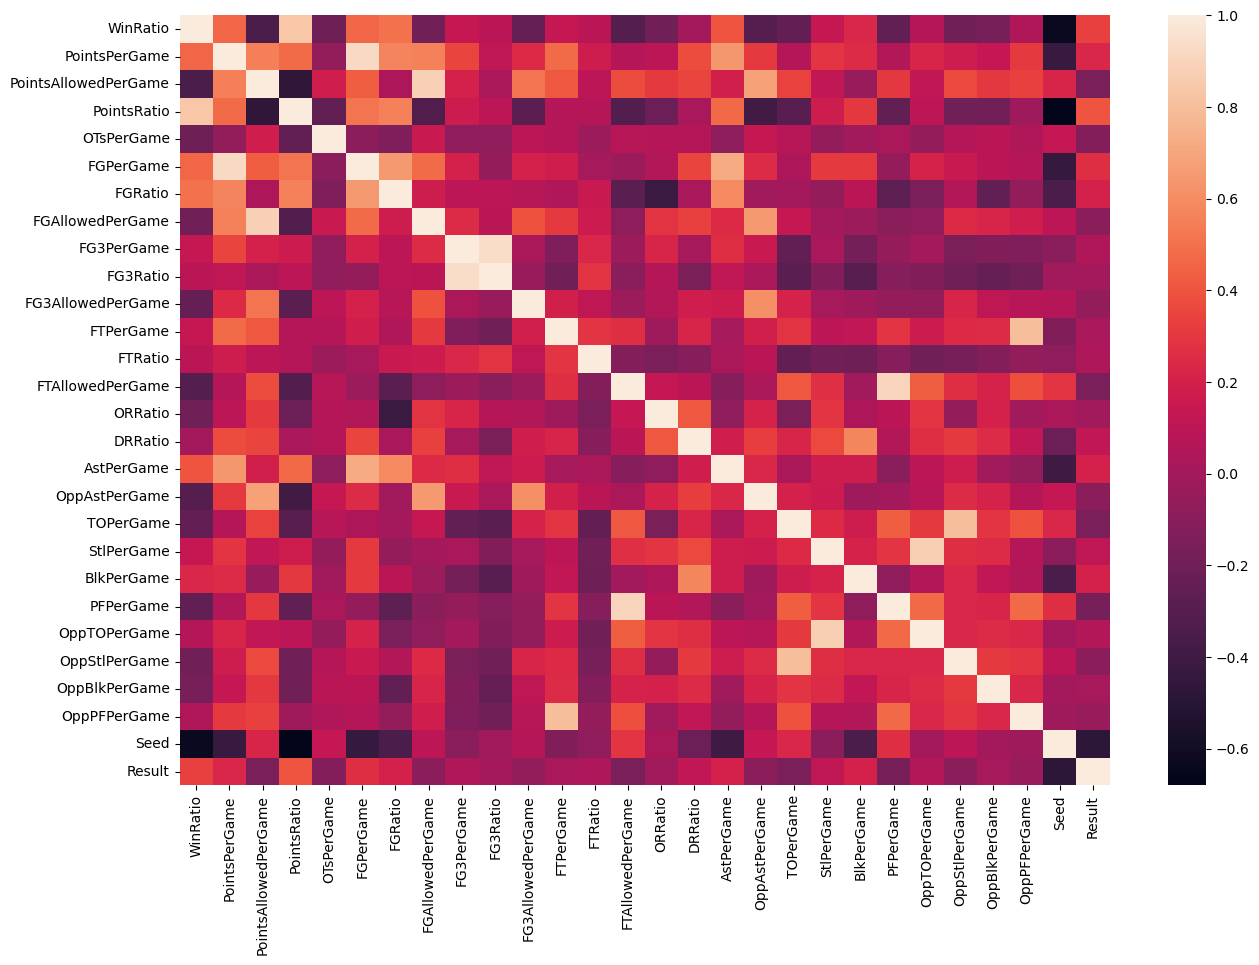

In [8]:
corrs = round(outscores.corr(),2)
display(np.abs(corrs['Result']))

import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(corrs)
plt.show()

In [9]:
X = outscores[outscores.columns[:-1]].values
Y= outscores['Result'].values

np.random.seed(1)
idx = np.random.permutation(len(X))
train_idx=idx[:int(-.2*len(X))]
test_idx=idx[int(-.2*len(X)):]

x_train= X[train_idx]
x_test = X[test_idx]
y_train = Y[train_idx]
y_test = Y[test_idx]

mins = x_train.min(axis=0)
maxs = x_train.max(axis=0)

x_train = (x_train-mins) /(maxs/mins)
x_test = (x_test-mins) /(maxs/mins)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1997, 27) (499, 27) (1997,) (499,)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model = model.fit(x_train, y_train)

data_to_submit = pd.DataFrame({
    model.score(x_test,y_test)
})

data_to_submit.to_csv('csv_to_submit.csv', index = False)